In [ ]:
import pandas as pd
import os

# path = "HyperparameterSearchAllModels"
# path = "Results/LOSO_500msSeq"
path = "Results/LOSO_a200_b300_f44_seq43_finalRounds"
results = pd.read_csv(os.path.join(path, "loso_log.csv"))
results["macro"] = (results["correct_acc"] + results["incorrect_acc"]) / 2
results

,name,model_type,cond,cv_k,test_participant,hidden_size,num_channels,kernel_size,latent_dim,learning_rate,count_parameter,th_percentile,th_value,correct_acc,incorrect_acc,macro
0,TCNAE_1,TCNAE,gaze,0,Pat001,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.238139,0.988506,NaN,NaN
1,TCNAE_1,TCNAE,gaze,1,Pat002,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.258295,1.000000,NaN,NaN
2,TCNAE_1,TCNAE,gaze,2,Pat003,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.186566,0.840909,0.8,0.820455
3,TCNAE_1,TCNAE,gaze,3,Pat004,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.184731,0.898990,1.0,0.949495
4,TCNAE_1,TCNAE,gaze,4,Pat005,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.125821,0.962025,0.0,0.481013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,TCNAE_3,TCNAE,nod,47,Pat048,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.250269,0.968421,0.0,0.484211
464,TCNAE_3,TCNAE,nod,48,Pat049,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.509800,0.988095,NaN,NaN
465,TCNAE_3,TCNAE,nod,49,Pat050,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.391499,0.933333,0.0,0.466667
466,TCNAE_3,TCNAE,nod,50,Pat051,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.516599,1.000000,NaN,NaN


In [ ]:
import numpy as np
def get_count(pat, cond, correct):
    if correct:
        names = np.load(f"../Data/Dataset_Prepare/names_fps90_{cond}_Correct_f44_b300_a200_finalRounds.npy")
    else:
        names = np.load(f"../Data/Dataset_Prepare/names_fps90_{cond}_Incorrect_f44_b300_a200_finalRounds.npy")
    return np.sum(names==pat)
    # return np.sum(correct_names == pat), np.sum(incorrect_names == pat)
# results[["n_correct", "n_incorrect"]] =
results["n_correct"] = results[["test_participant", "cond"]].apply(lambda x: get_count(x["test_participant"], x["cond"], True), axis=1)
results["n_incorrect"] = results[["test_participant", "cond"]].apply(lambda x: get_count(x["test_participant"], x["cond"], False), axis=1)  
results["micro"] = (results["correct_acc"] * results["n_correct"] + results["incorrect_acc"] * results["n_incorrect"]) / (results["n_correct"] + results["n_incorrect"])
# cor, incor = 0, 0
# for i in range(51):
#     c, ic = get_count("Pat%03d" % (i+1), "headAndGaze")
#     cor += c
#     incor += ic
#     print(c, ic)
# print(cor, incor)
results

,name,model_type,cond,cv_k,test_participant,hidden_size,num_channels,kernel_size,latent_dim,learning_rate,count_parameter,th_percentile,th_value,correct_acc,incorrect_acc,macro,n_correct,n_incorrect,micro
0,TCNAE_1,TCNAE,gaze,0,Pat001,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.238139,0.988506,NaN,NaN,174,0,NaN
1,TCNAE_1,TCNAE,gaze,1,Pat002,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.258295,1.000000,NaN,NaN,184,0,NaN
2,TCNAE_1,TCNAE,gaze,2,Pat003,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.186566,0.840909,0.8,0.820455,176,10,0.838710
3,TCNAE_1,TCNAE,gaze,3,Pat004,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.184731,0.898990,1.0,0.949495,198,2,0.900000
4,TCNAE_1,TCNAE,gaze,4,Pat005,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.125821,0.962025,0.0,0.481013,158,4,0.938272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,TCNAE_3,TCNAE,nod,47,Pat048,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.250269,0.968421,0.0,0.484211,190,2,0.958333
464,TCNAE_3,TCNAE,nod,48,Pat049,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.509800,0.988095,NaN,NaN,168,0,NaN
465,TCNAE_3,TCNAE,nod,49,Pat050,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.391499,0.933333,0.0,0.466667,90,4,0.893617
466,TCNAE_3,TCNAE,nod,50,Pat051,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.516599,1.000000,NaN,NaN,76,0,NaN


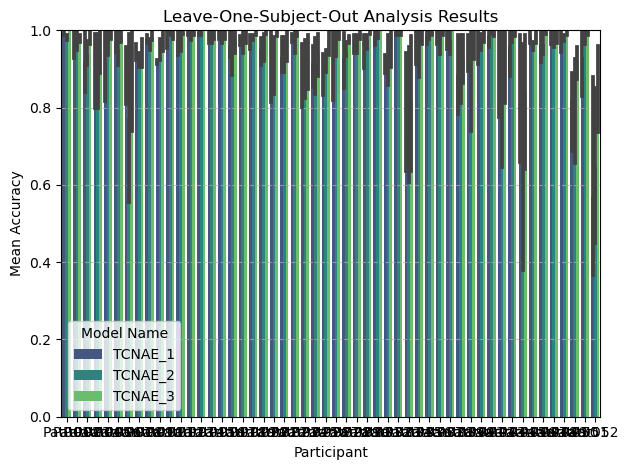

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    data=results,
    x="test_participant",
    y="correct_acc",
    hue="name",
    palette="viridis"
)

plt.title("Leave-One-Subject-Out Analysis Results",)
plt.xlabel("Participant")
plt.ylabel("Mean Accuracy")
plt.legend(title="Model Name")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

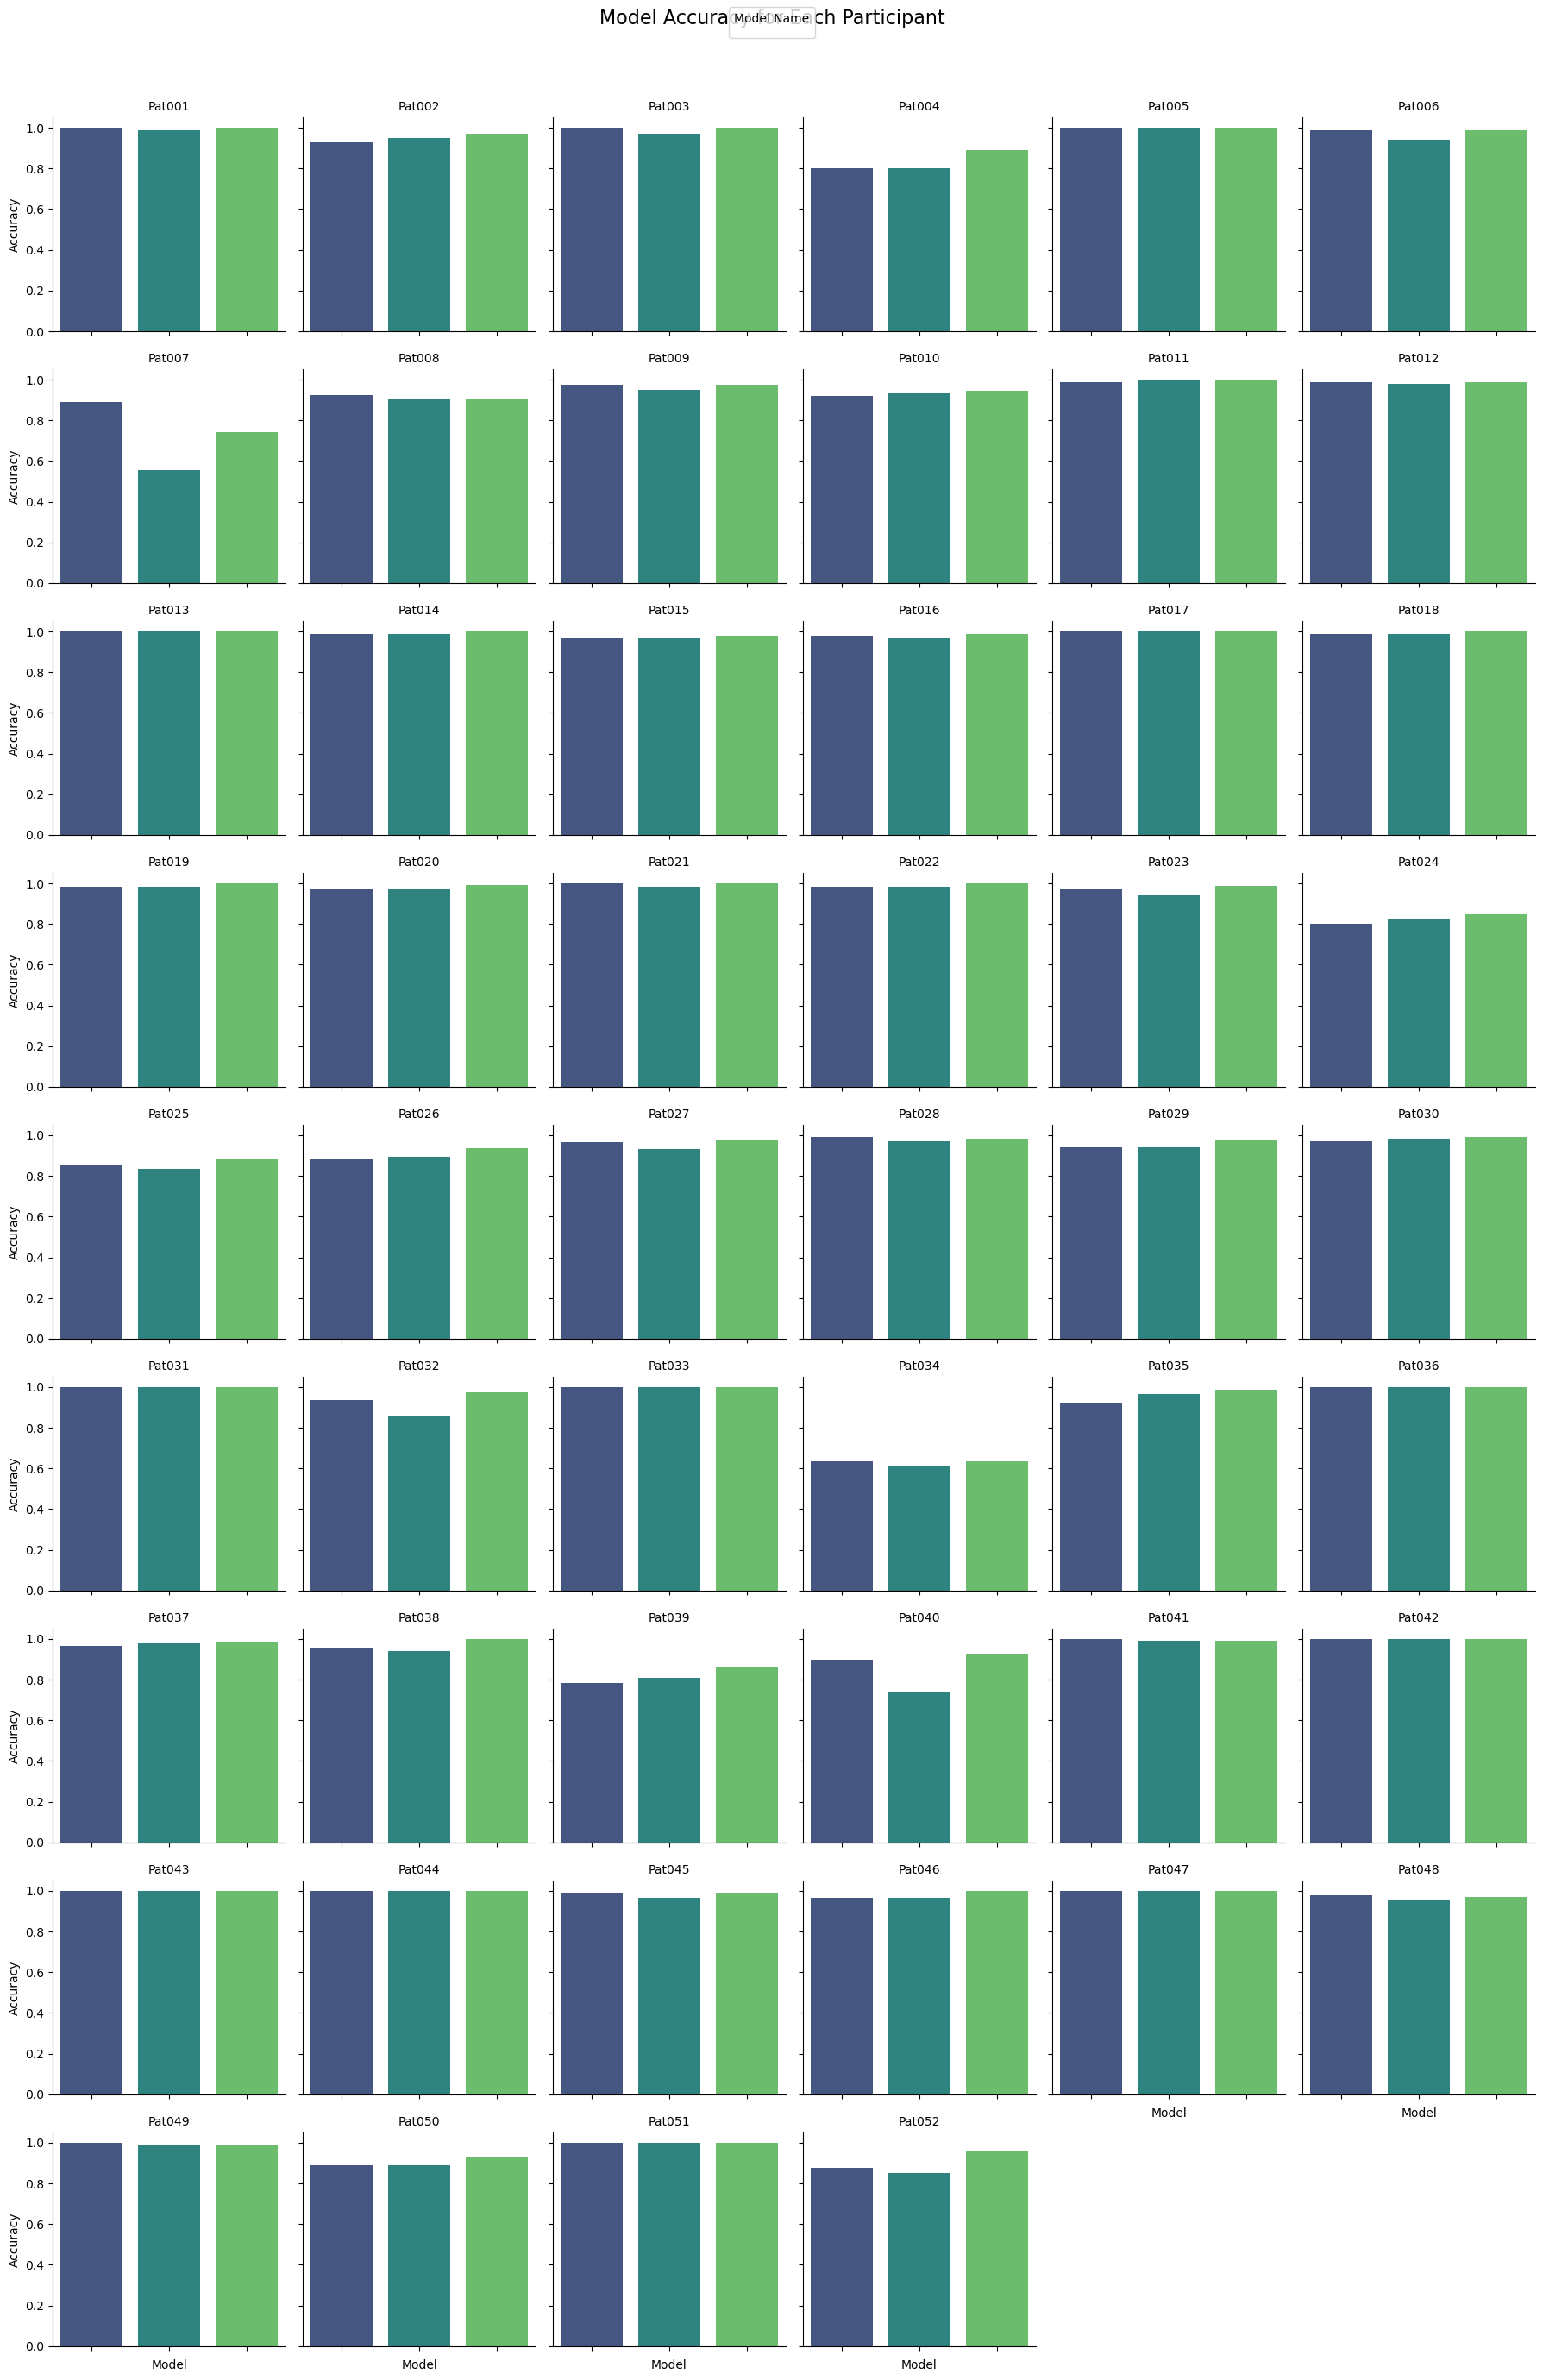

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = results.loc[results.cond=="nod"]

# Create a FacetGrid
g = sns.FacetGrid(df, col="test_participant", col_wrap=6, height=3, sharey=True)
g.map(sns.barplot, "name", "correct_acc", order=df['name'].unique(), palette="viridis")

# Customize the layout
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Accuracy")
g.set_xticklabels(rotation=45)
g.fig.suptitle('Model Accuracy for Each Participant', y=1.02, fontsize=16)

handles, labels = g.axes[0].get_legend_handles_labels()
g.fig.legend(handles, labels, title="Model Name", loc='upper center', ncol=3, fontsize=12)


# plt.legend()
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


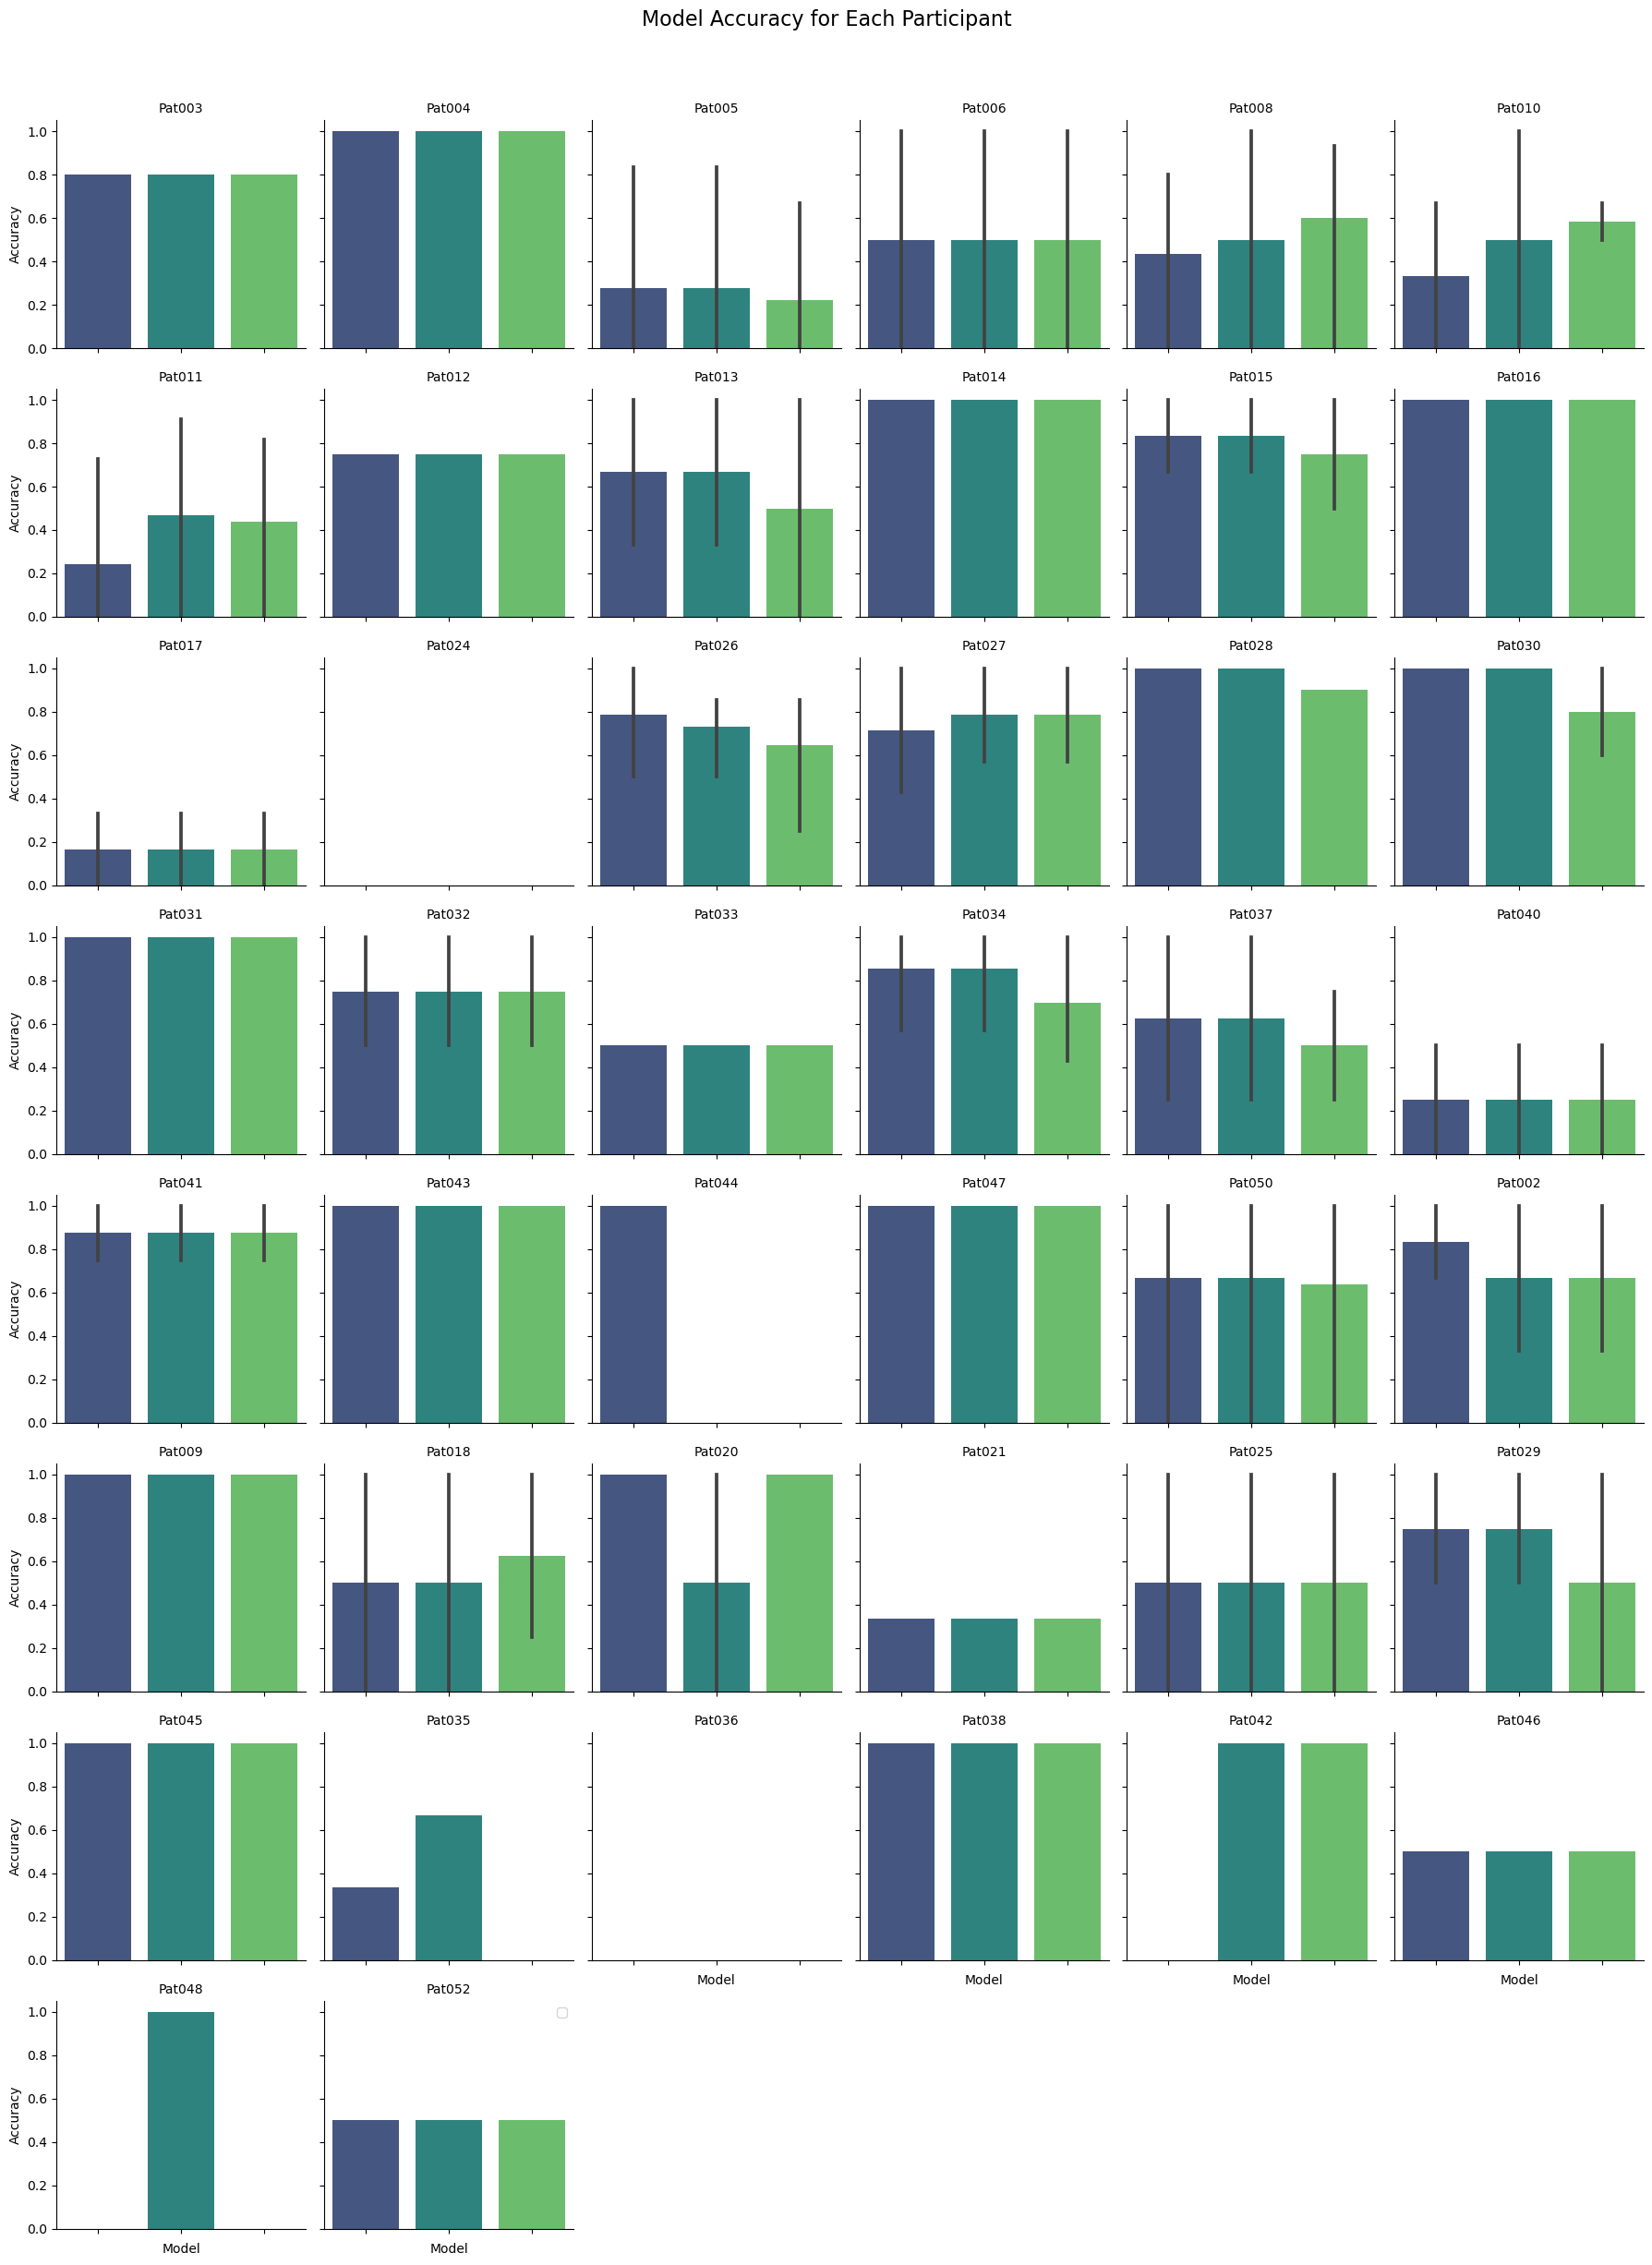

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = results.loc[~results.incorrect_acc.isna()]

# Create a FacetGrid
g = sns.FacetGrid(df, col="test_participant", col_wrap=6, height=3, sharey=True)
g.map(sns.barplot, "name", "incorrect_acc", order=results['name'].unique(), palette="viridis")

# Customize the layout
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Accuracy")
g.set_xticklabels(rotation=45)
g.fig.suptitle('Model Accuracy for Each Participant', y=1.02, fontsize=16)

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df

,name,model_type,cond,cv_k,test_participant,hidden_size,num_channels,kernel_size,latent_dim,learning_rate,count_parameter,th_percentile,th_value,correct_acc,incorrect_acc,macro,n_correct,n_incorrect,micro
2,TCNAE_1,TCNAE,gaze,2,Pat003,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.186566,0.840909,0.8,0.820455,176,10,0.838710
3,TCNAE_1,TCNAE,gaze,3,Pat004,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.184731,0.898990,1.0,0.949495,198,2,0.900000
4,TCNAE_1,TCNAE,gaze,4,Pat005,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.125821,0.962025,0.0,0.481013,158,4,0.938272
5,TCNAE_1,TCNAE,gaze,5,Pat006,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.213461,0.920000,0.0,0.460000,200,2,0.910891
7,TCNAE_1,TCNAE,gaze,7,Pat008,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.261519,0.965517,0.8,0.882759,174,10,0.956522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,TCNAE_3,TCNAE,nod,41,Pat042,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.456014,1.000000,1.0,1.000000,188,2,1.000000
461,TCNAE_3,TCNAE,nod,45,Pat046,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.378996,1.000000,0.5,0.750000,180,4,0.989130
463,TCNAE_3,TCNAE,nod,47,Pat048,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.250269,0.968421,0.0,0.484211,190,2,0.958333
465,TCNAE_3,TCNAE,nod,49,Pat050,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.391499,0.933333,0.0,0.466667,90,4,0.893617


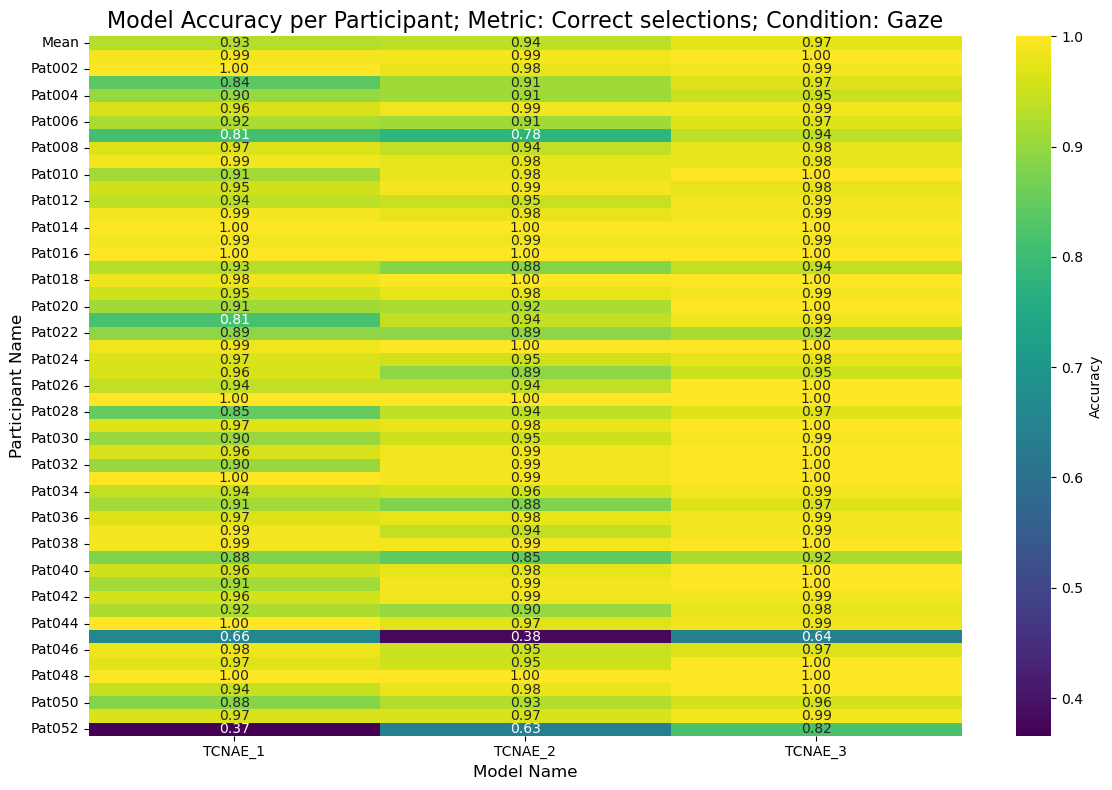

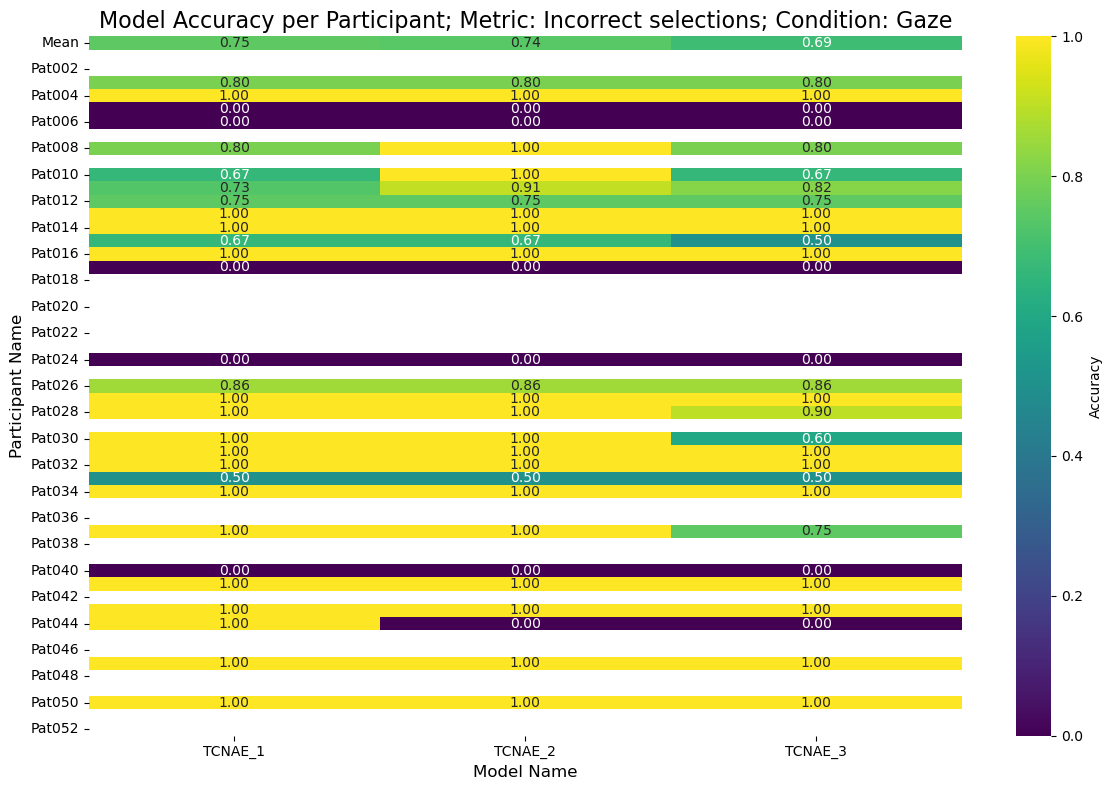

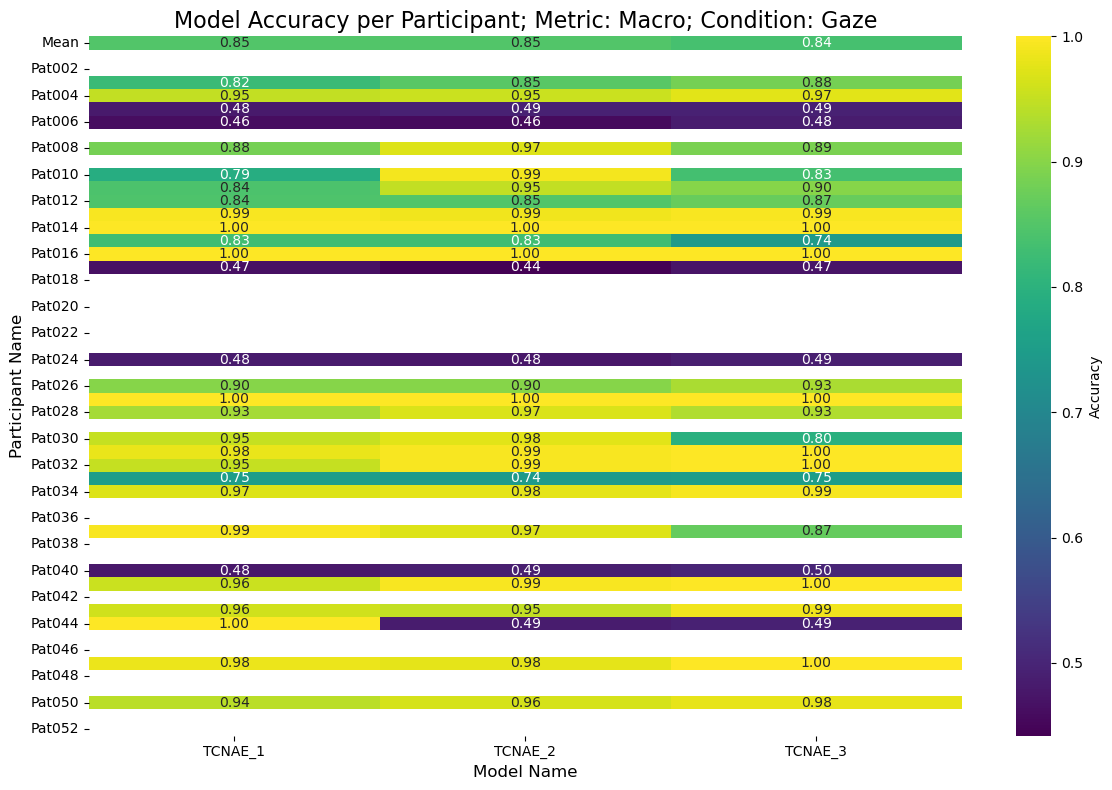

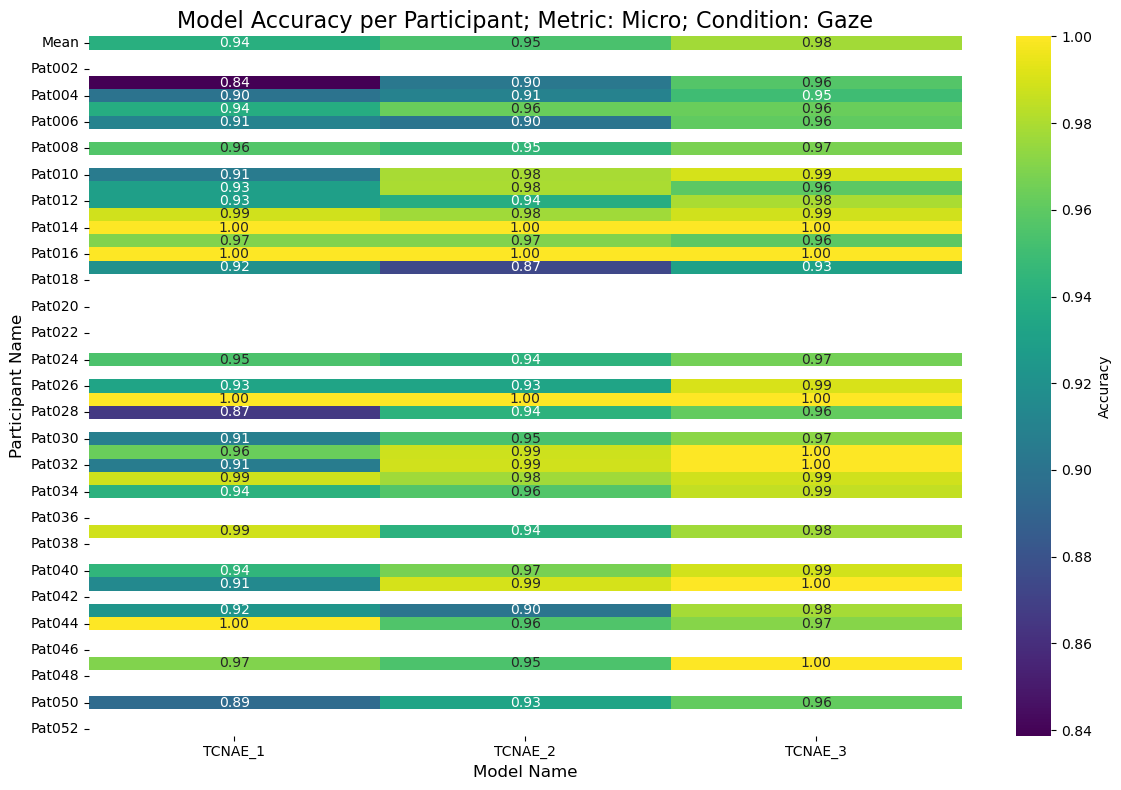

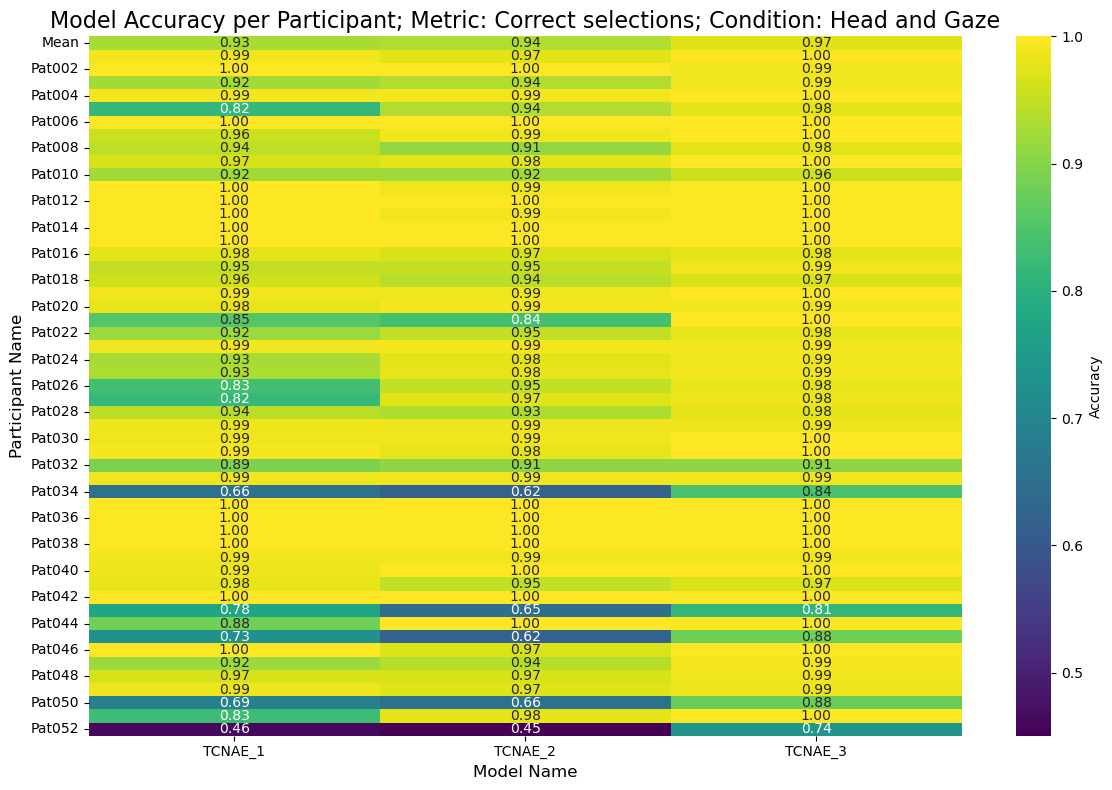

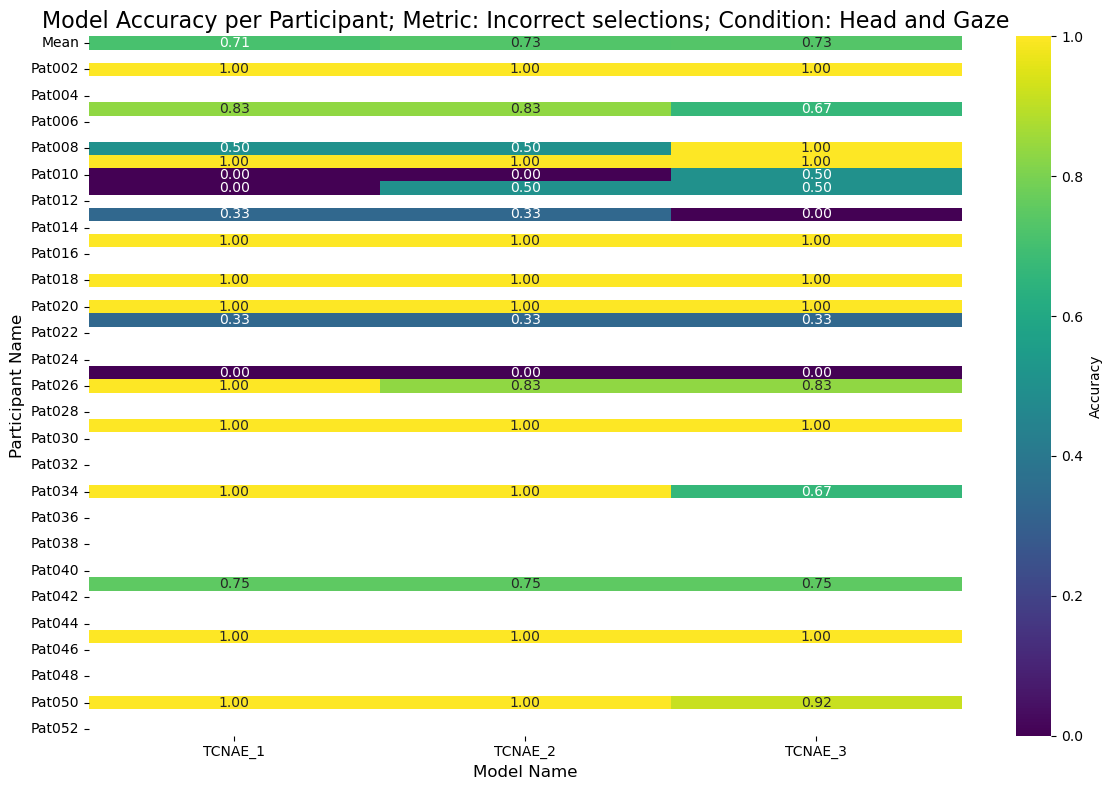

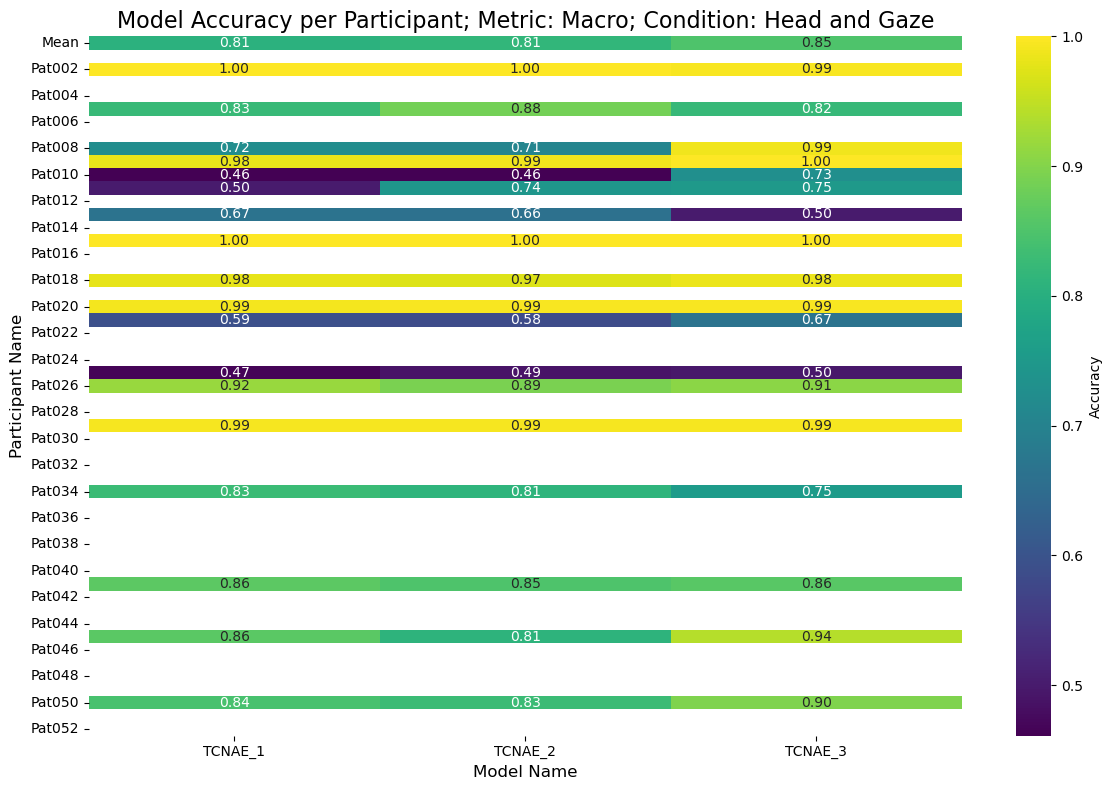

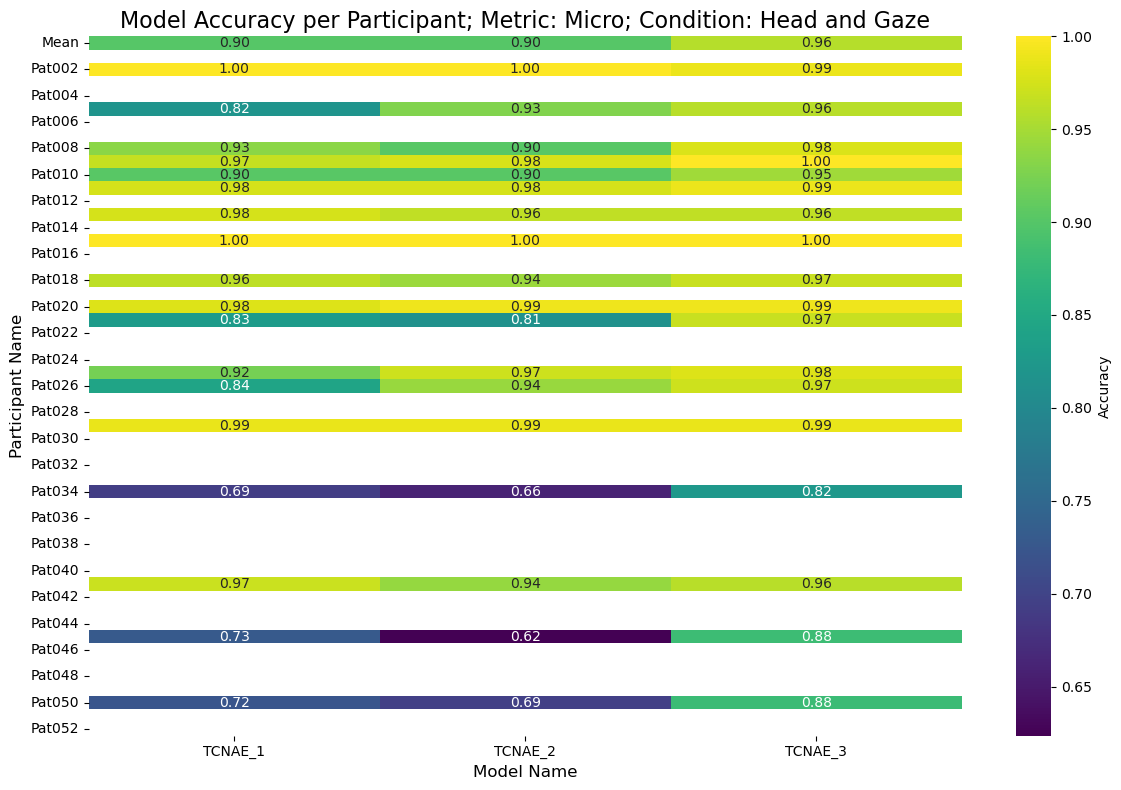

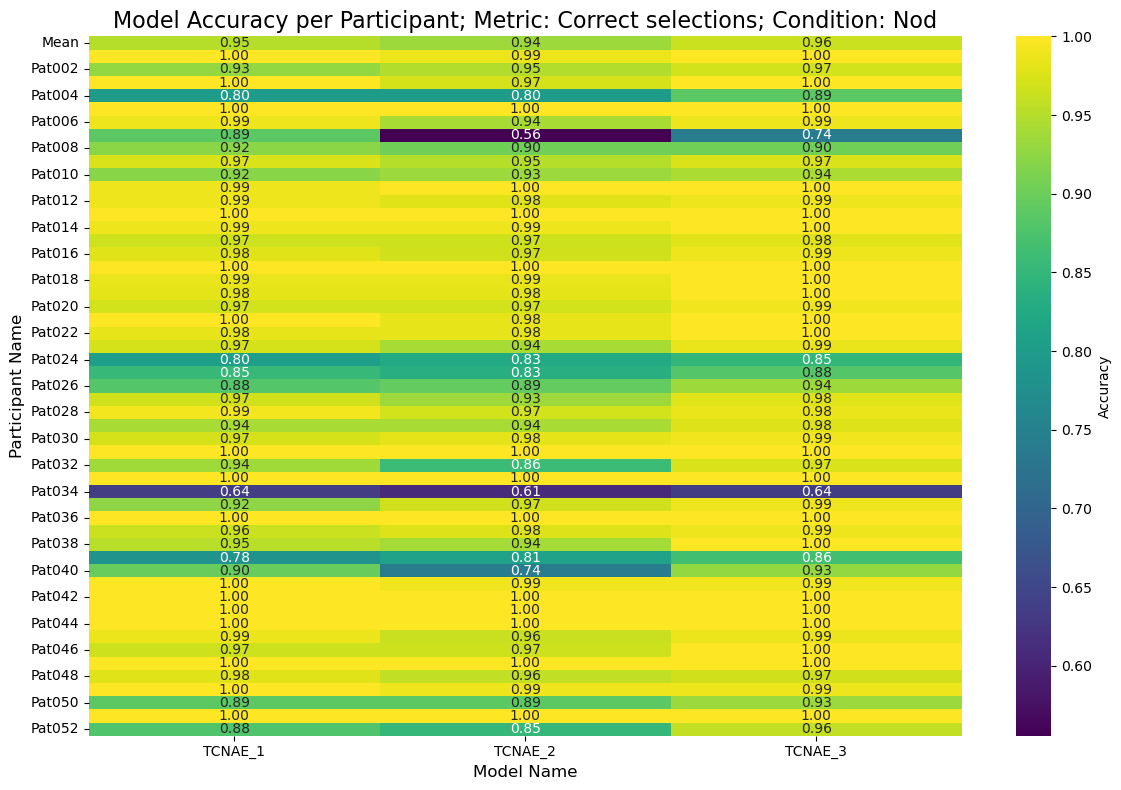

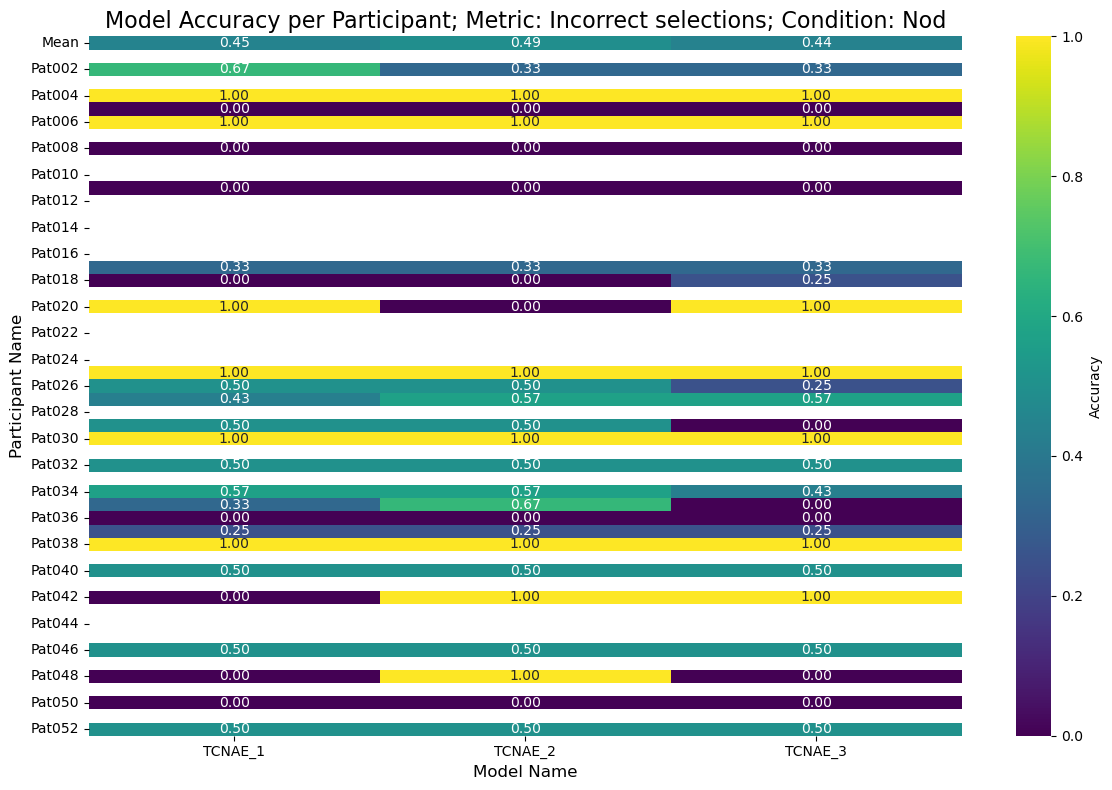

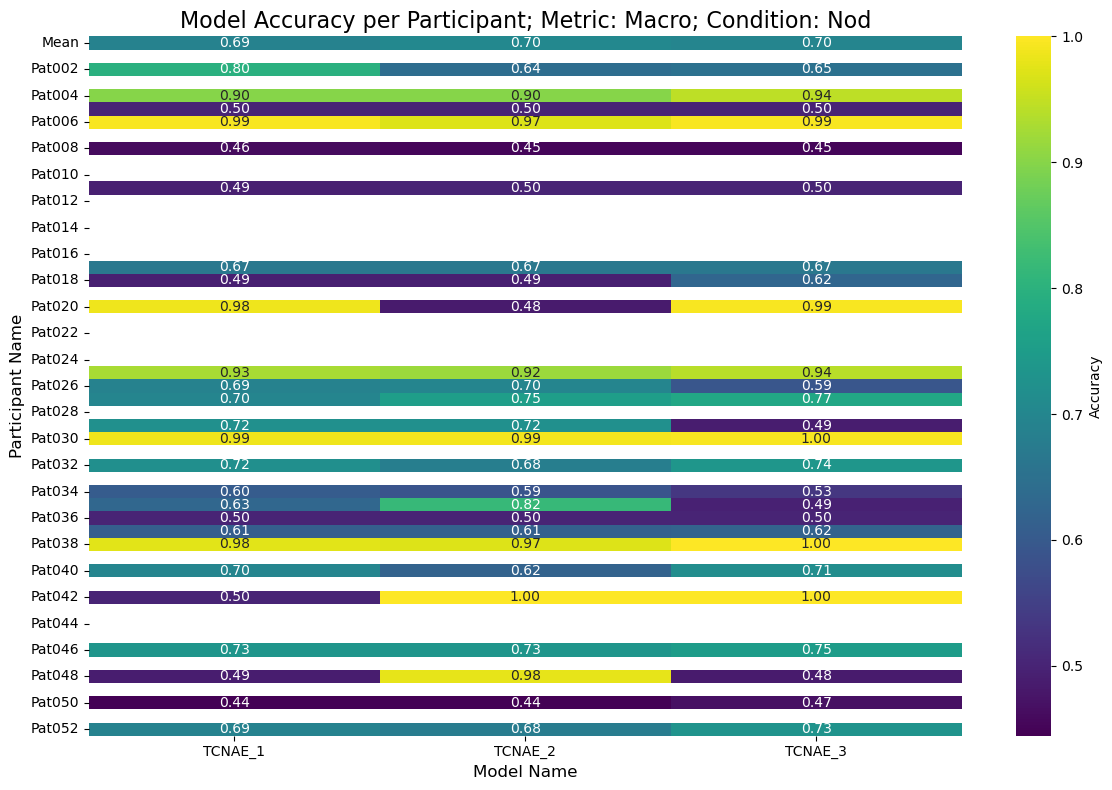

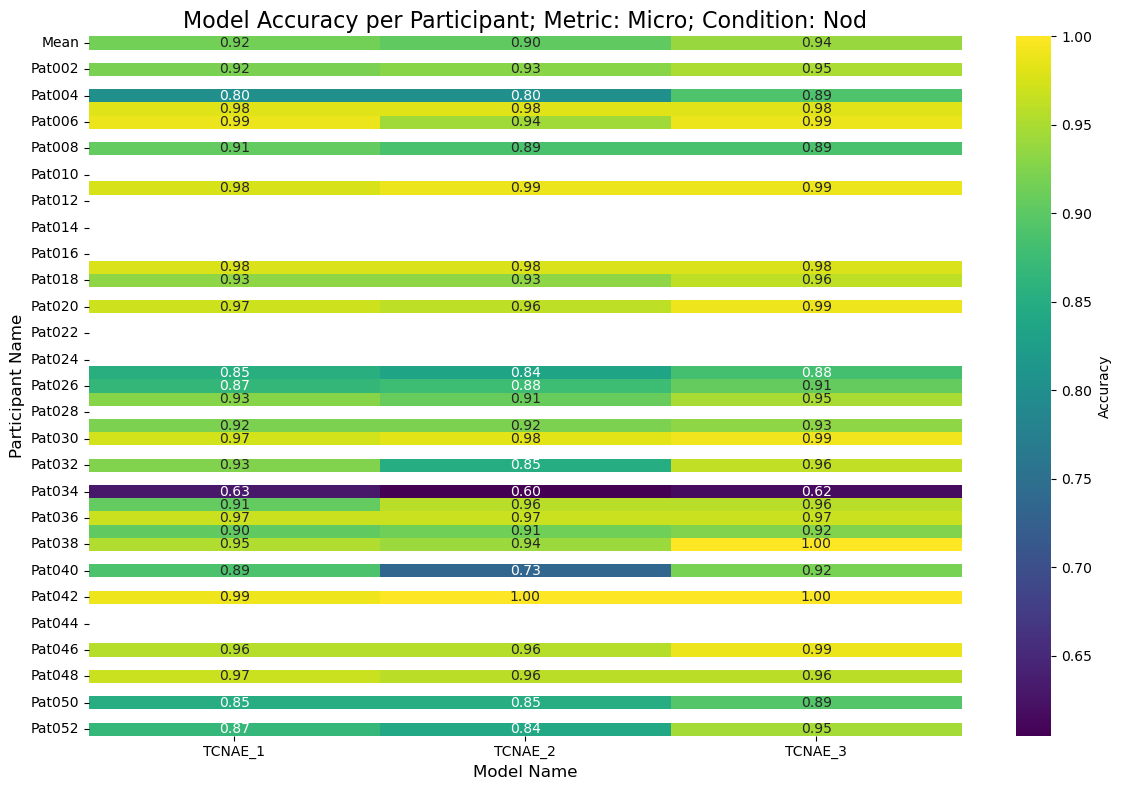

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

metric = "correct_acc"
condition = "nod"

metric_rename = {"correct_acc": "Correct selections", "incorrect_acc": "Incorrect selections", "macro": "Macro", "micro": "Micro"}
condition_rename = {"nod": "Nod", "headAndGaze": "Head and Gaze", "gaze": "Gaze"}

mean_dfs = list()

for condition in ["gaze", "headAndGaze", "nod"]:
    for metric in ["correct_acc", "incorrect_acc", "macro", "micro"]:
        df = results.loc[results.cond==condition, ["name", "test_participant", metric]]

        mean_df = df.groupby("name", as_index=False)[metric].agg(np.nanmean)
        mean_df["test_participant"] = "Mean"
        df = pd.concat([df, mean_df], ignore_index=True)
        mean_df["cond"] = condition_rename[condition]
        mean_df["metric"] = metric_rename[metric]
        mean_df.rename(columns={metric: "Accuracy"}, inplace=True)
        mean_dfs.append(mean_df.copy())

        # Pivot the DataFrame
        heatmap_data = df.pivot(index="test_participant", columns="name", values=metric)

        # Plot the heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Accuracy'})

        # Customize the heatmap
        plt.title(f'Model Accuracy per Participant; Metric: {metric_rename[metric]}; Condition: {condition_rename[condition]}', fontsize=16)
        plt.xlabel('Model Name', fontsize=12)
        plt.ylabel('Participant Name', fontsize=12)

        plt.tight_layout()
        plt.show()


In [ ]:
mean_df

,name,Accuracy,test_participant,cond,metric
0,TCNAE_1,0.915544,Mean,Nod,Micro
1,TCNAE_2,0.904037,Mean,Nod,Micro
2,TCNAE_3,0.938901,Mean,Nod,Micro


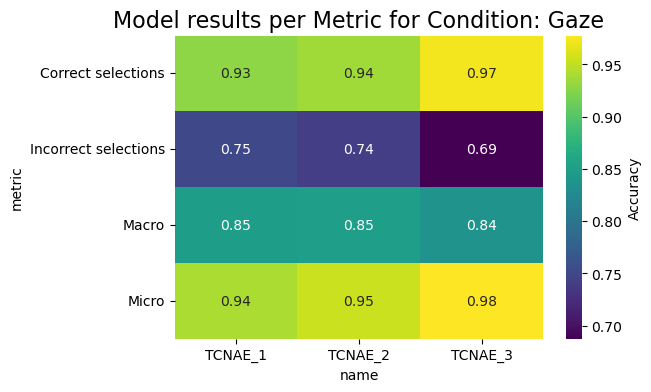

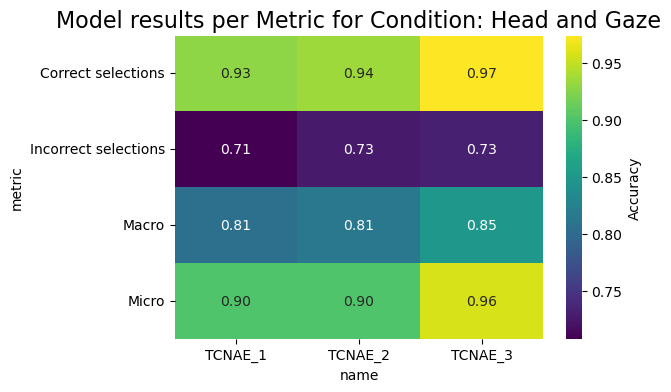

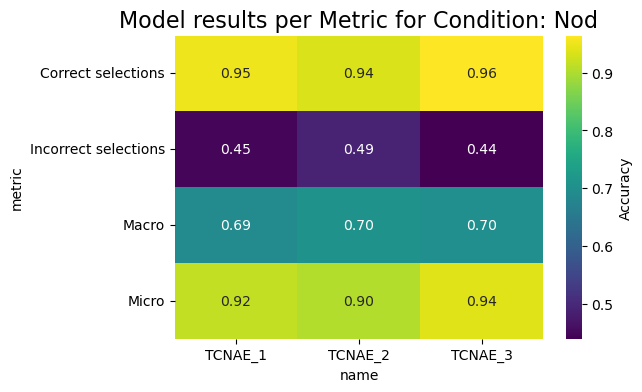

In [ ]:

def cm_to_inch(cm):
    return cm / 2.54

# fig, axs = plt.subplots(1, 3, figsize=(cm_to_inch(15.11), cm_to_inch(20)), sharey=True)
# visualize the mean accuracy as heatmap
cond = "Nod"
for cond in ["Gaze", "Head and Gaze", "Nod"]:
    mean_df = pd.concat(mean_dfs, ignore_index=True)
    mean_df = mean_df.loc[mean_df.cond==cond]
    plt.figure(figsize=(cm_to_inch(15.11), cm_to_inch(10)))
    sns.heatmap(mean_df.pivot(index="metric", columns="name", values="Accuracy"), annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Accuracy'})
    plt.title(f"Model results per Metric for Condition: {cond}", fontsize=16)

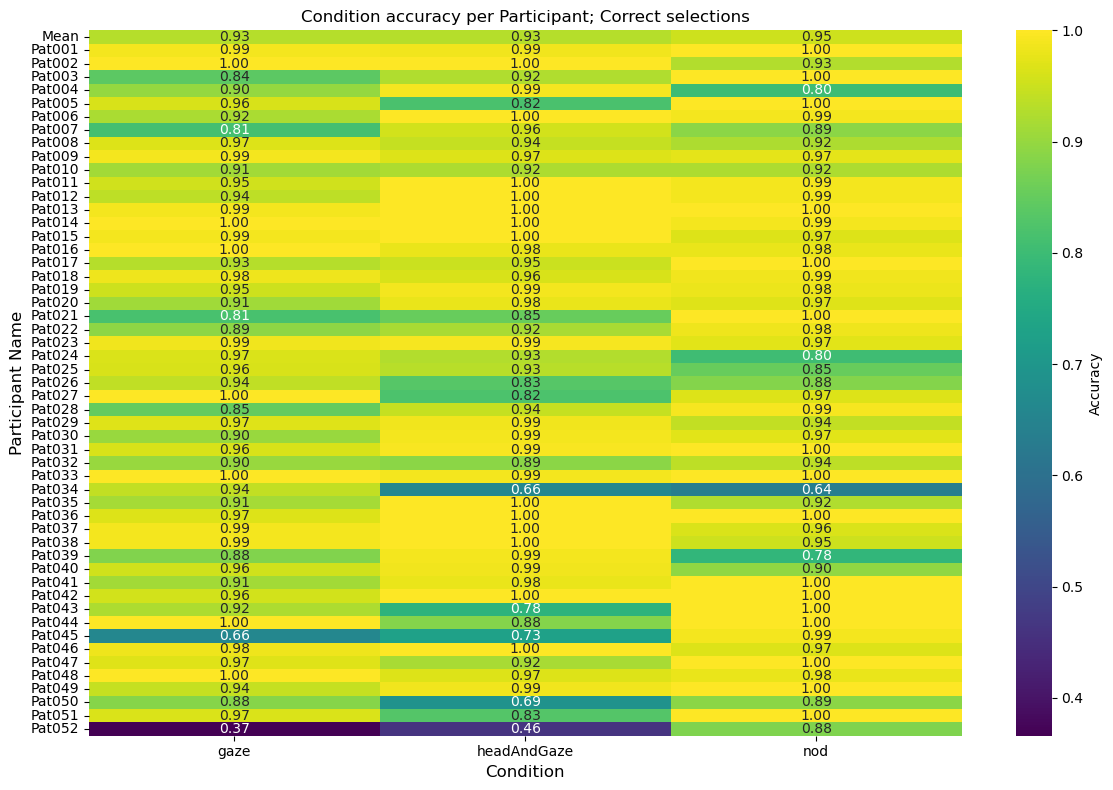

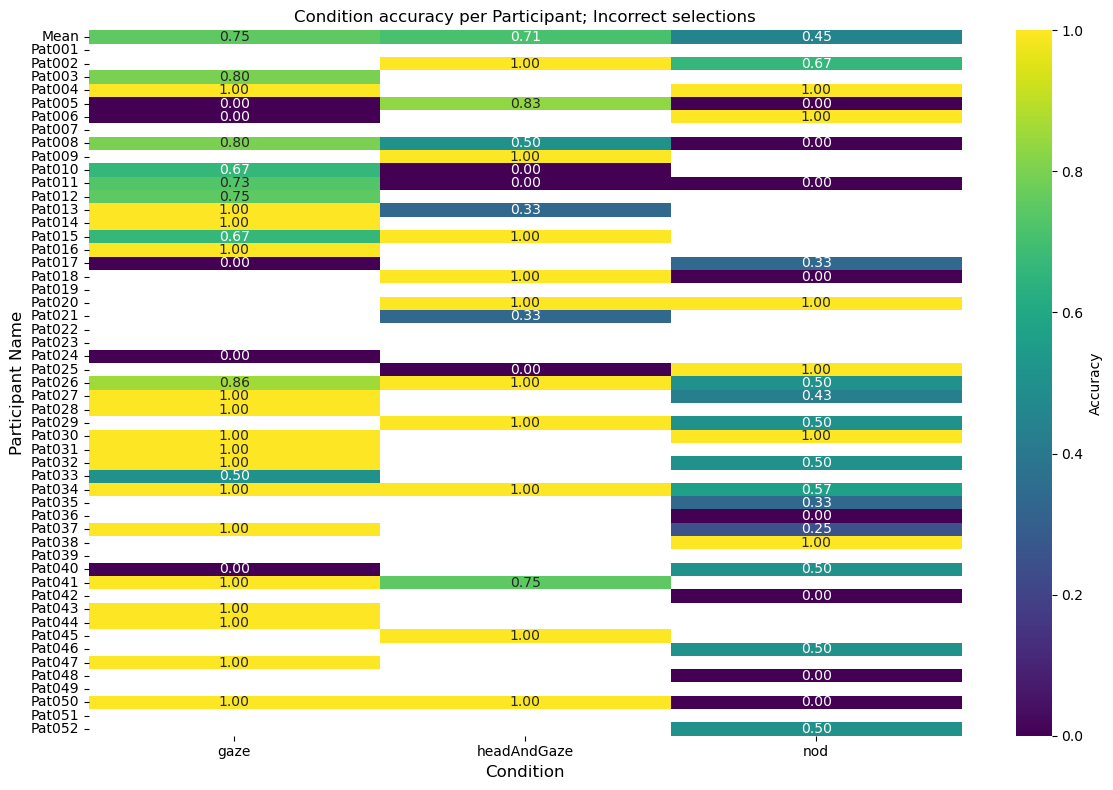

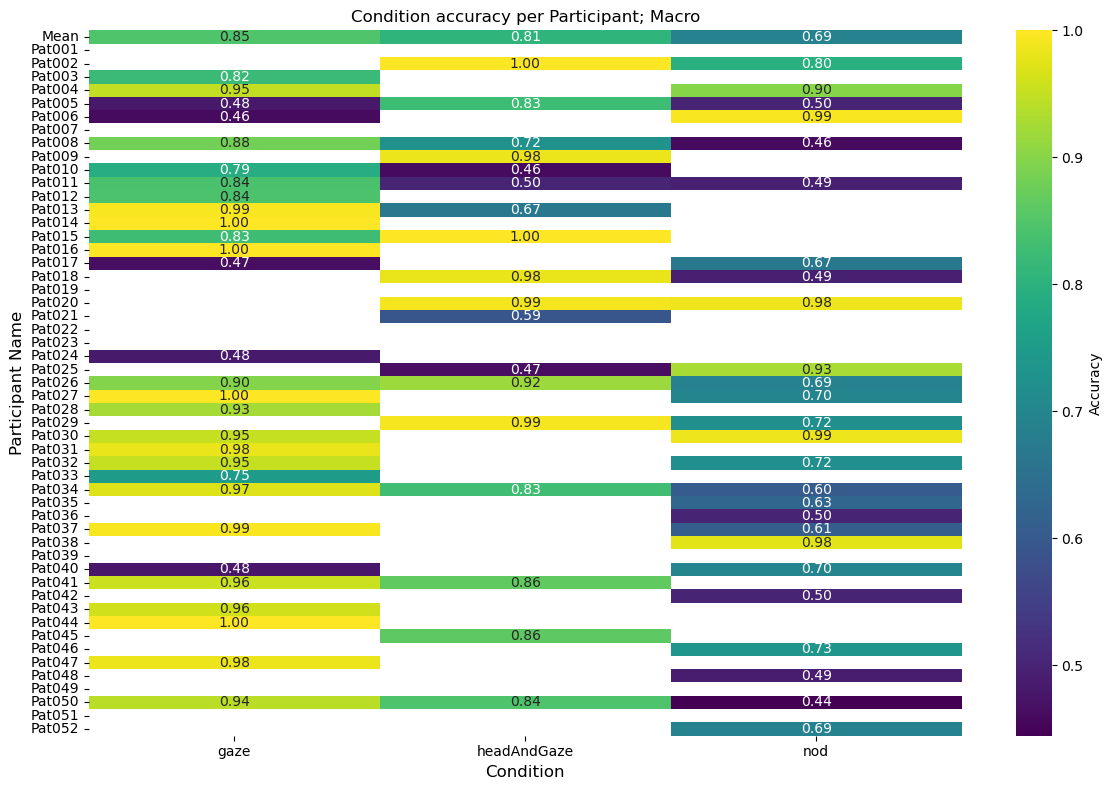

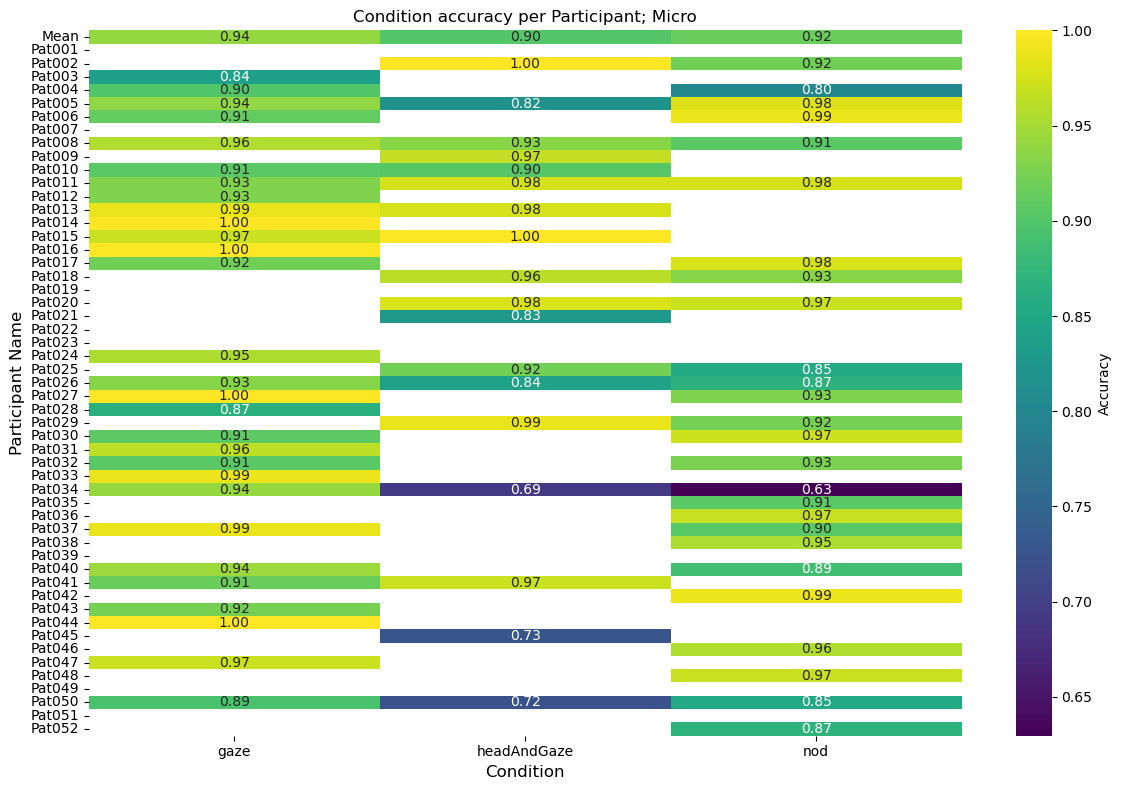

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

metric_rename = {"correct_acc": "Correct selections", "incorrect_acc": "Incorrect selections", "macro": "Macro", "micro": "Micro"}
condition_rename = {"nod": "Nod", "headAndGaze": "Head and Gaze", "gaze": "Gaze"}

# metric = "mean_acc"
for metric in ["correct_acc", "incorrect_acc", "macro", "micro"]:
    df = results.loc[results.name=="TCNAE_1", ["cond", "test_participant", metric]]
    # df = results.loc[results.name.apply(lambda x: x in ["TCNAE_4", "TCNAE_8", "TCNAE_12"]), ["cond", "test_participant", metric]]
    # df = results.loc[results.name.apply(lambda x: x in ["TCNAE_2", "TCNAE_4", "TCNAE_6"]), ["cond", "test_participant", metric]]
    mean_df = df.groupby("cond", as_index=False)[metric].agg(np.nanmean)
    mean_df["test_participant"] = "Mean"
    df = pd.concat([df, mean_df], ignore_index=True)
    heatmap_data = df.pivot(index="test_participant", columns="cond", values=metric)
    # display(heatmap_data)
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Accuracy'}, yticklabels=True)

    plt.title(f'Condition accuracy per Participant; {metric_rename[metric]}')
    plt.xlabel("Condition", fontsize=12)
    plt.ylabel("Participant Name", fontsize=12)

    plt.tight_layout()
    plt.show()

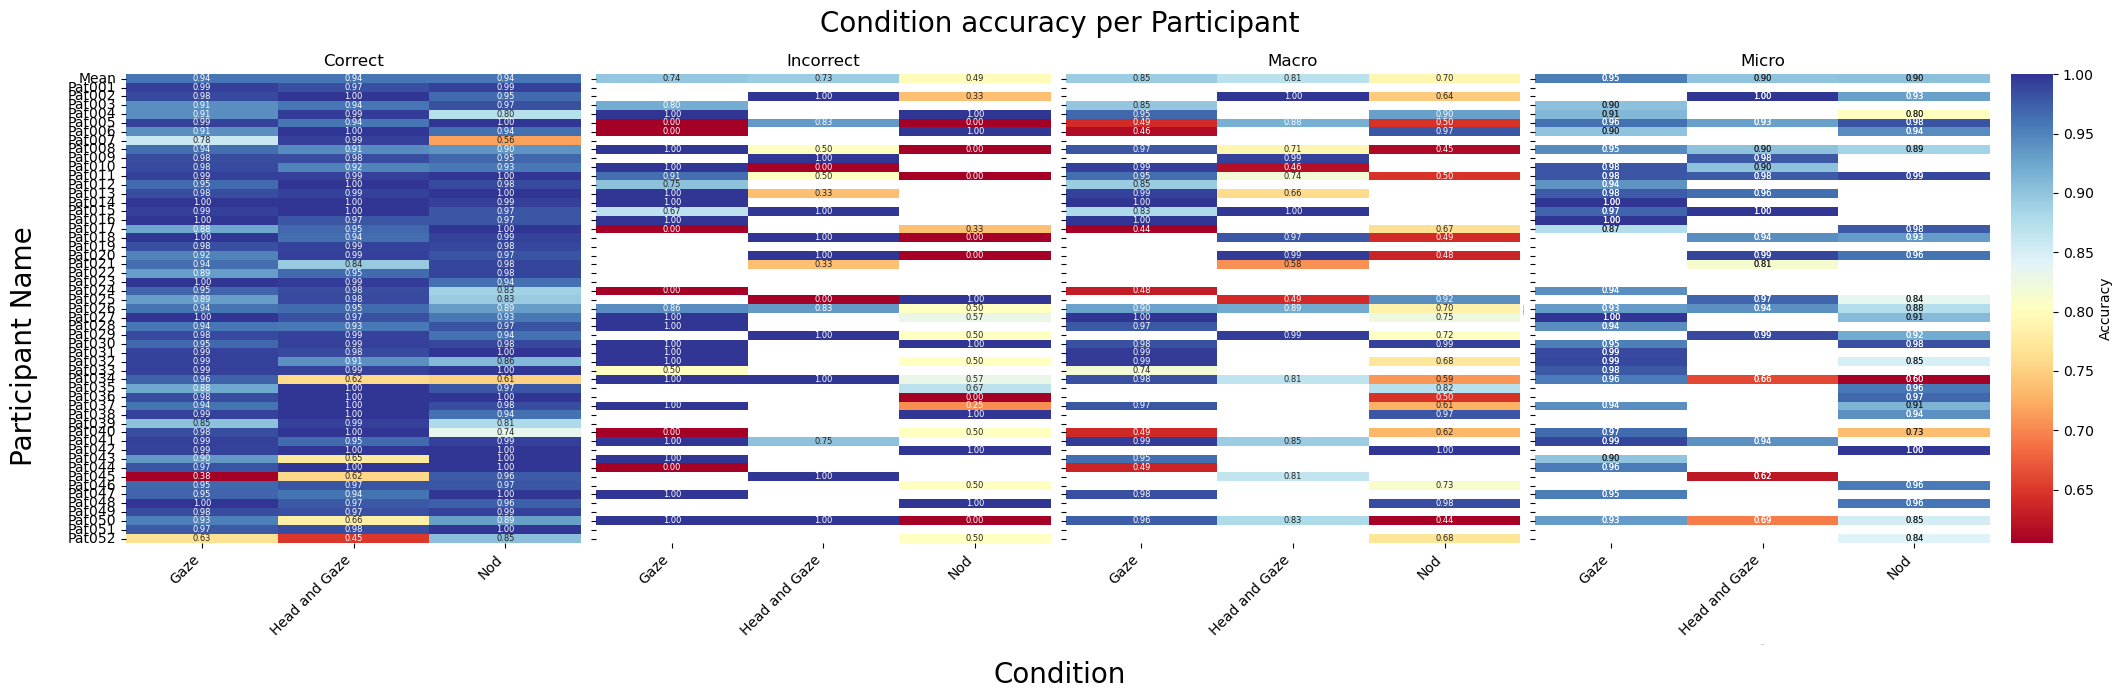

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

metric_rename = {"correct_acc": "Correct", "incorrect_acc": "Incorrect", "macro": "Macro", "micro": "Micro"}
condition_rename = {"nod": "Nod", "headAndGaze": "Head and Gaze", "gaze": "Gaze"}
# condition_rename = {"nod": "N", "headAndGaze": "HaG", "gaze": "G"}
def cm_to_inch(cm):
    return cm / 2.54

fig, axs = plt.subplots(1, 4, figsize=(cm_to_inch(15.11), cm_to_inch(20)), sharey=True)
# fig, axs = plt.subplots(1, 4, figsize=(21,7), sharey=True)



for metric, ax in zip(["correct_acc", "incorrect_acc", "macro", "micro"], axs):
    df = results.loc[results.name.apply(lambda x: x in ["TCNAE_2", "TCNAE_4", "TCNAE_6"]), ["cond", "test_participant", metric]]
    df.cond = df.cond.apply(lambda x: condition_rename[x])
    mean_df = df.groupby("cond", as_index=False)[metric].agg(np.nanmean)
    mean_df["test_participant"] = "Mean"
    df = pd.concat([df, mean_df], ignore_index=True)
    heatmap_data = df.pivot(index="test_participant", columns="cond", values=metric)

    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlBu", yticklabels=True, annot_kws={"size":6}, ax=ax, 
                cbar=False, cbar_kws={'label': 'Accuracy'}, cbar_ax=None) 

    ax.set_title(f'{metric_rename[metric]}')
    ax.set_xlabel("", fontsize=1)
    ax.set_ylabel("", fontsize=1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)



label_font_size = 20
fig.supylabel("Participant Name", fontsize=label_font_size, x=0)
fig.supxlabel("Condition", fontsize=label_font_size)
fig.suptitle("Condition accuracy per Participant", fontsize=label_font_size)

# Automatically calculate the position and size of the color bar
fig.tight_layout(rect=[0, 0, 0.95, 1])
bbox = axs[-1].get_position()
cbar_ax = fig.add_axes([bbox.x1 + 0.01, bbox.y0, 0.02, bbox.height])  # [left, bottom, width, height]

# Add the color bar
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlBu", yticklabels=True, annot_kws={"size":6}, ax=axs[-1], 
            cbar=True, cbar_kws={'label': 'Accuracy'}, cbar_ax=cbar_ax)



# plt.tight_layout(rect=[0, 0, 0.9, 0.9])
# fig.subplots_adjust(right=0.85)
plt.savefig("Results_Imgs/condition_accuracy_per_participant.png", dpi=500)
plt.show()

In [ ]:
df

,cond,test_participant,micro
0,G,Pat001,NaN
1,G,Pat002,NaN
2,G,Pat003,0.903226
3,G,Pat004,0.910000
4,G,Pat005,0.962963
...,...,...,...
154,N,Pat051,NaN
155,N,Pat052,0.842105
156,G,Mean,0.953931
157,HaG,Mean,0.900687


Model: TCNAE_1


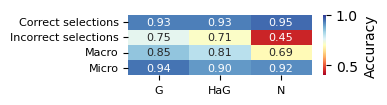

Model: TCNAE_2


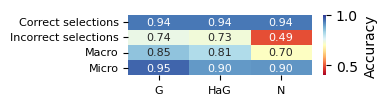

Model: TCNAE_3


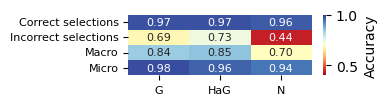

In [ ]:

summary_df = pd.concat(mean_dfs)

condition = "Nod"
condition_rename = {"Nod": "N", "Head and Gaze": "HaG", "Gaze": "G"}
# model = "TCNAE_4"
# for model_nr in [1, 2, 3, 4]:
for model_nr in [1, 2, 3]:
# model_nr = 1
    # df = summary_df.loc[summary_df.name.apply(lambda x: x in ["TCNAE_%d" % x for x in [model_nr, model_nr+2, model_nr+4]]), ["cond", "metric", "Accuracy"]]
    df = summary_df.loc[summary_df.name == f"TCNAE_{model_nr}", ["cond", "metric", "Accuracy"]]
    df.cond = df.cond.apply(lambda x: condition_rename[x])
    # Pivot the DataFrame
    heatmap_data = df.pivot(index="metric", columns="cond", values="Accuracy")

    print("="*80)
    print(f"Model: TCNAE_{model_nr}")
    print("="*80)
    # Plot the heatmap
    plt.figure(figsize=(cm_to_inch(7.5), cm_to_inch(2)))
    ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", yticklabels=True, cmap="RdYlBu", annot_kws={"size":8}, cbar_kws={'label': 'Accuracy'}, vmin=00.4, vmax=1)

    # Customize the heatmap
    # plt.title(f'Model Accuracy per Condition', fontsize=13, fontname="sans-serif")
    # plt.title(f'', fontsize=13)
    plt.xlabel('', fontsize=8)
    plt.ylabel('', fontsize=8)
    plt.yticks(fontsize=8)
    # plt.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    # plt.xticks(fontsize=8, ha='right', rotation=45)
    plt.xticks(fontsize=8)
    # plt.tight_layout(rect=[0, 0, 0.95, 1])
    # plt.tight_layout()
    # 
    plt.savefig(f"Results_Imgs/model_{model_nr}_accuracy_per_condition.png", dpi=500, bbox_inches='tight')
    plt.show()

In [ ]:
best_model_results = pd.read_csv(os.path.join(path, "end_models.csv"))
best_model_results

,model_name,cond,th_perc,correct_acc,incorrect_acc
0,TCNAE_1,gaze,99,0.989964,0.830000
1,TCNAE_1,headAndGaze,99,0.989994,0.862069
2,TCNAE_1,nod,99,0.989940,0.455882
3,TCNAE_2,gaze,95,0.949818,0.870000
4,TCNAE_2,headAndGaze,95,0.949968,0.793103
5,TCNAE_2,nod,95,0.949940,0.470588
6,TCNAE_3,gaze,99,0.989964,0.820000
7,TCNAE_3,headAndGaze,99,0.989994,0.620690
8,TCNAE_3,nod,99,0.989940,0.338235


In [ ]:
import numpy as np
summary_results = results.groupby(["name", "cond"])[["correct_acc", "incorrect_acc", "macro", "micro"]].agg([np.nanmean, np.nanstd])
summary_results# .sort_values(("mean_acc", "mean"), ascending=False)

correct_acc           incorrect_acc               macro  \
                        nanmean    nanstd       nanmean    nanstd   nanmean   
name    cond                                                                  
TCNAE_1 gaze           0.928233  0.101033      0.750612  0.373491  0.847572   
        headAndGaze    0.928399  0.107164      0.708333  0.398373  0.805432   
        nod            0.950591  0.071528      0.445513  0.378357  0.688517   
TCNAE_2 gaze           0.936135  0.100740      0.740790  0.402837  0.849255   
        headAndGaze    0.935364  0.117557      0.726852  0.356780  0.814800   
        nod            0.935155  0.093900      0.489469  0.382265  0.704165   
TCNAE_3 gaze           0.972780  0.056232      0.687655  0.387775  0.836315   
        headAndGaze    0.974046  0.052847      0.731481  0.340073  0.848516   
        nod            0.964295  0.068037      0.439103  0.395314  0.697957   

                                  micro            
                       nanstd   nanmean    nanstd  
name    cond                                       
TCNAE_1 gaze         0.186866  0.940675  0.042105  
        headAndGaze  0.192165  0.900503  0.102682  
        nod          0.181226  0.915544  0.076521  
TCNAE_2 gaze         0.204342  0.953931  0.033245  
        headAndGaze  0.175539  0.900687  0.120483  
        nod          0.186681  0.904037  0.088998  
TCNAE_3 gaze         0.195736  0.977421  0.018523  
        headAndGaze  0.167164  0.957473  0.047571  
        nod          0.199375  0.938901  0.075321

In [ ]:
groupby_cols = ["num_channels", "kernel_size", "latent_dim", "learning_rate", "th_percentile"]
summary_results = results.groupby(groupby_cols)[["correct_acc", "incorrect_acc", "mean_acc"]].agg(["mean", "std"])
summary_results.sort_values(("mean_acc", "mean"), ascending=False)

KeyError: "Columns not found: 'mean_acc'"

In [ ]:
results.loc[(results.num_channels=="[8, 16]") & (results.kernel_size==3) & (results.latent_dim==10) & (results.learning_rate==1e-2) & (results.th_percentile==99)].groupby("cond")[["correct_acc", "incorrect_acc", "mean_acc"]].agg(["mean", "std"])

Empty DataFrame
Columns: [(correct_acc, mean), (correct_acc, std), (incorrect_acc, mean), (incorrect_acc, std), (mean_acc, mean), (mean_acc, std)]
Index: []

In [ ]:
np.nanstd([1, np.nan, 2, 3])

0.816496580927726